In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df_train=pd.read_csv("./data/train.csv",index_col=0)
df_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [6]:
df_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000
mean,0.257830,0.431720,0.114130,0.590550,0.599770,0.160820,0.731490,1.228920,0.903350,0.940120,...,0.712270,0.582070,0.529230,0.616310,0.135100,0.358660,0.516810,0.39004,0.970850,0.55712
std,0.929033,1.977862,0.519584,1.844558,2.785531,0.601149,2.343465,2.692732,3.415258,1.904172,...,1.721863,2.003114,2.300826,2.360955,0.627592,1.464187,2.171415,1.48735,2.576615,1.68093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.00000
max,10.000000,31.000000,6.000000,26.000000,38.000000,10.000000,27.000000,31.000000,39.000000,17.000000,...,21.000000,32.000000,37.000000,33.000000,9.000000,26.000000,29.000000,25.00000,44.000000,20.00000


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   feature_0   100000 non-null  int64 
 1   feature_1   100000 non-null  int64 
 2   feature_2   100000 non-null  int64 
 3   feature_3   100000 non-null  int64 
 4   feature_4   100000 non-null  int64 
 5   feature_5   100000 non-null  int64 
 6   feature_6   100000 non-null  int64 
 7   feature_7   100000 non-null  int64 
 8   feature_8   100000 non-null  int64 
 9   feature_9   100000 non-null  int64 
 10  feature_10  100000 non-null  int64 
 11  feature_11  100000 non-null  int64 
 12  feature_12  100000 non-null  int64 
 13  feature_13  100000 non-null  int64 
 14  feature_14  100000 non-null  int64 
 15  feature_15  100000 non-null  int64 
 16  feature_16  100000 non-null  int64 
 17  feature_17  100000 non-null  int64 
 18  feature_18  100000 non-null  int64 
 19  feature_19  100000 non-n

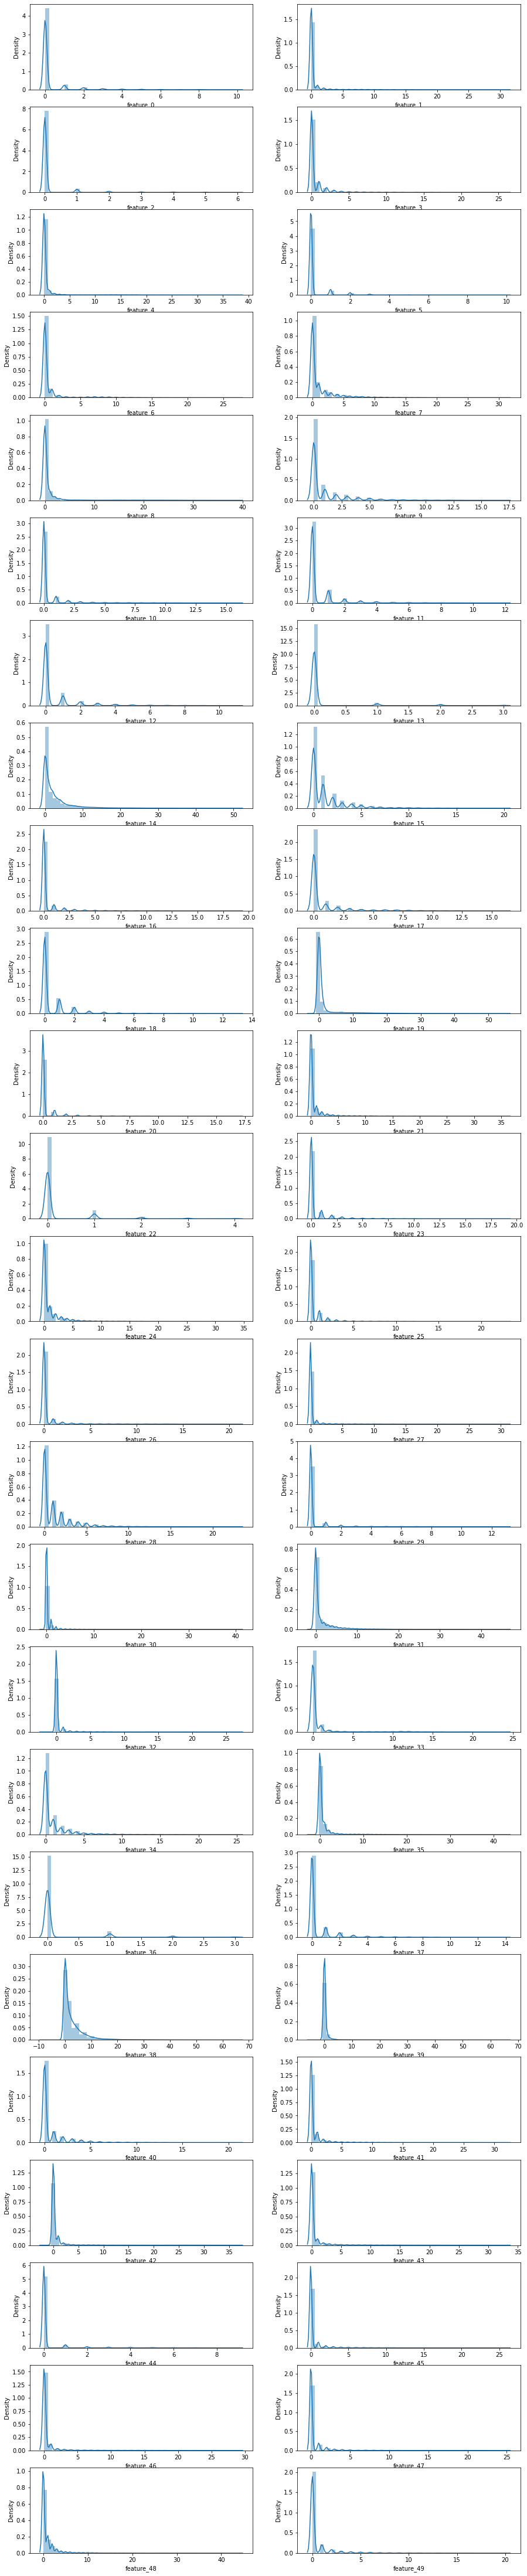

In [17]:
fig,axes=plt.subplots(25,2,figsize=(13,100))
for column,ax in zip(df_train.columns,axes.ravel()):
    sns.distplot(df_train[column],ax=ax)

In [7]:
print("Kurtosis\n")
print(df_train.kurtosis())
print("\n\n\nSkewness\n")
print(df_train.skew())

Kurtosis

feature_0      30.881530
feature_1      59.035926
feature_2      40.419017
feature_3      43.936518
feature_4      44.905716
feature_5      47.397492
feature_6      24.749068
feature_7      15.902236
feature_8      32.255105
feature_9      10.345414
feature_10     40.673355
feature_11     17.974300
feature_12     15.630032
feature_13     31.765137
feature_14     19.205376
feature_15     12.382874
feature_16     42.370480
feature_17     12.370601
feature_18     21.345662
feature_19     24.118273
feature_20     56.629746
feature_21     46.226795
feature_22     15.728138
feature_23     39.364007
feature_24     25.957830
feature_25     55.870167
feature_26     52.157882
feature_27     92.574756
feature_28     12.590462
feature_29     60.679807
feature_30    241.709738
feature_31     25.622646
feature_32    105.789383
feature_33     27.376983
feature_34     19.165452
feature_35     35.322997
feature_36     18.567723
feature_37     24.998328
feature_38     23.807502
feature_39     

<AxesSubplot:xlabel='target', ylabel='count'>

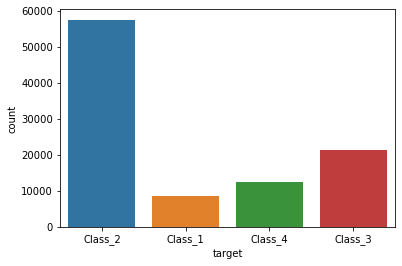

In [16]:
sns.countplot(df_train["target"])

<AxesSubplot:>

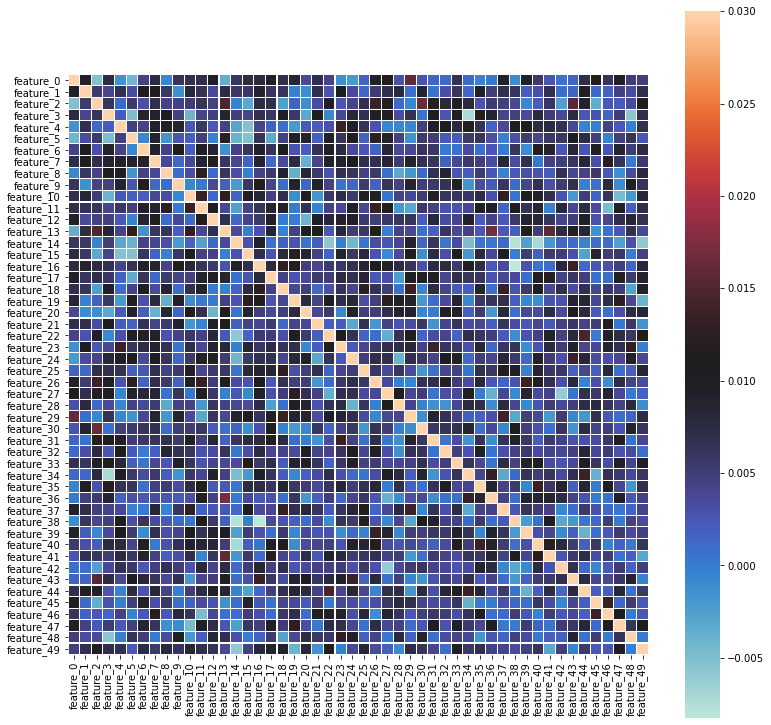

In [50]:
plt.figure(figsize=(13,13))
sns.heatmap(df_train.corr(),cmap="icefire",cbar=True,vmax=0.03,square=True,linewidths=0.1)

In [66]:
means=[]
cats=df_train["target"].unique()
for cat in cats:
    df_cat=df_train.loc[df_train["target"]==cat]
    means.append(np.array(df_cat[df_cat.columns[:-1]].mean()))
means=np.array(means)

In [69]:
print(means.shape)
print(cats)

(4, 50)
['Class_2' 'Class_1' 'Class_4' 'Class_3']


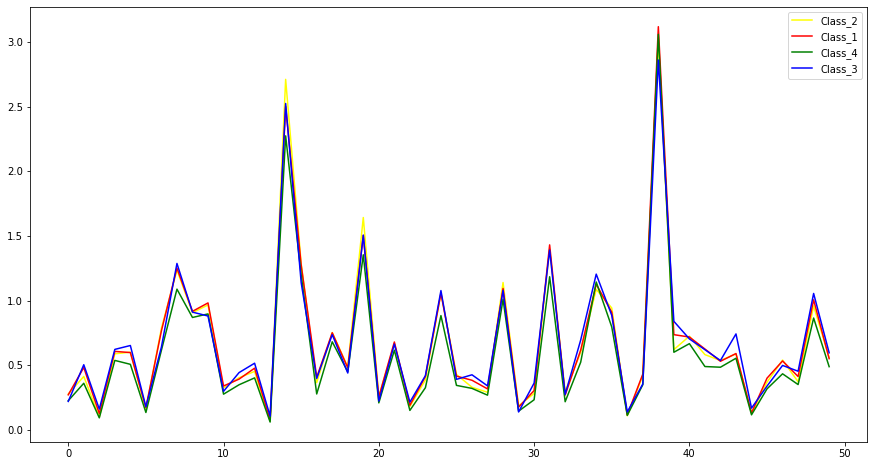

In [73]:
plt.figure(figsize=(15,8))
colors=["yellow","red","green","blue"]
for color,mn,cat in zip(colors,means,cats):
    plt.plot(range(len(mn)),mn,color=color,label=cat)

plt.legend(loc=1)

In [7]:
X=df_train[df_train.columns[:-1]].to_numpy()
y=df_train[df_train.columns[-1]].to_numpy().reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [8]:
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
rfc=RandomForestClassifier().fit(X_train,y_train)

print("LogisticRegression accuracy: {}".format(lr.score(X_test,y_test)))
print("LogisticRegression log_loss: {}".format(log_loss(y_test,lr.predict_proba(X_test))))
print("RFC accuracy: {}".format(rfc.score(X_test,y_test)))
print("RFC log_loss: {}".format(log_loss(y_test,rfc.predict_proba(X_test))))

LogisticRegression accuracy: 0.57
LogisticRegression log_loss: 1.11
RFC accuracy: 0.58
RFC log_loss: 1.13


In [15]:
pipe=Pipeline(steps=[("scaler",StandardScaler()),("classifier",LogisticRegression(max_iter=10000))])
param_grid={"classifier__C":[0.0001,0.001,0.01,0.1,1,10]}
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5,n_jobs=-1,scoring="neg_log_loss")

In [16]:
grid.fit(X_train,y_train)
print("Best params: {}".format(grid.best_params_))
print("Best score: {}".format(grid.best_score_))
print("Test score: {}".format(grid.score(X_test,y_test)))

Best params: {'classifier__C': 0.001, 'scaler': StandardScaler()}
Best score: -1.1073733153260736


In [9]:
pipe_rfc=Pipeline(steps=[("scaler",StandardScaler()),
                         ("classifier",RandomForestClassifier(random_state=42))])
param_grid_rfc={"classifier__min_samples_split":[2,3,4,5],
               "classifier__max_features":["sqrt","log2"],
               "classifier__n_estimators":[100,200],
               "classifier__criterion":["gini","entropy"]}
grid_rfc=GridSearchCV(pipe_rfc,param_grid=param_grid_rfc,cv=5,n_jobs=-1,scoring="neg_log_loss")


In [10]:
grid_rfc.fit(X_train,y_train)

print("Best params: {}".format(grid_rfc.best_params_))
print("Best score: {}".format(grid_rfc.best_score_))
print("Test score: {}".format(grid_rfc.score(X_test,y_test)))

Best params: {'classifier__criterion': 'entropy', 'classifier__max_features': 'log2', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best score: -1.1092335372493214


In [12]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.826934,0.017275,0.079572,0.002575,"LogisticRegression(C=0.001, max_iter=10000)",0.0001,"{'classifier': LogisticRegression(C=0.001, max...",-1.108649,-1.108836,-1.109407,-1.109503,-1.108021,-1.108883,0.000540,4
1,0.889311,0.020965,0.076775,0.002711,"LogisticRegression(C=0.001, max_iter=10000)",0.0005,"{'classifier': LogisticRegression(C=0.001, max...",-1.106853,-1.107539,-1.108259,-1.108161,-1.106118,-1.107386,0.000810,2
2,0.872517,0.012870,0.080974,0.003999,"LogisticRegression(C=0.001, max_iter=10000)",0.001,"{'classifier': LogisticRegression(C=0.001, max...",-1.106738,-1.107594,-1.108345,-1.108169,-1.106020,-1.107373,0.000879,1
3,0.846726,0.021635,0.070378,0.003927,"LogisticRegression(C=0.001, max_iter=10000)",0.005,"{'classifier': LogisticRegression(C=0.001, max...",-1.106736,-1.107777,-1.108567,-1.108296,-1.106046,-1.107484,0.000954,3


In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.DataFrame(grid_rfc.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_features,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
71,25.764434,0.545794,0.923495,0.069725,entropy,log2,5,200,"{'classifier__criterion': 'entropy', 'classifi...",-1.108543,-1.110771,-1.110043,-1.108591,-1.108220,-1.109234,0.000994,1
68,26.757907,0.132484,1.010272,0.035046,entropy,log2,4,200,"{'classifier__criterion': 'entropy', 'classifi...",-1.109774,-1.110484,-1.108787,-1.109262,-1.111394,-1.109940,0.000920,2
65,27.441285,0.111712,1.011672,0.005863,entropy,log2,3,200,"{'classifier__criterion': 'entropy', 'classifi...",-1.112110,-1.109943,-1.110697,-1.109646,-1.109697,-1.110418,0.000925,3
59,32.793945,0.200720,0.924101,0.009066,entropy,sqrt,5,200,"{'classifier__criterion': 'entropy', 'classifi...",-1.110837,-1.111723,-1.112566,-1.108289,-1.109928,-1.110669,0.001480,4
47,32.960093,0.080133,0.934495,0.017932,entropy,auto,5,200,"{'classifier__criterion': 'entropy', 'classifi...",-1.110837,-1.111723,-1.112566,-1.108289,-1.109928,-1.110669,0.001480,4
70,19.847352,0.219014,0.745358,0.034564,entropy,log2,5,150,"{'classifier__criterion': 'entropy', 'classifi...",-1.110664,-1.112819,-1.112246,-1.110513,-1.109884,-1.111225,0.001114,6
53,34.375432,0.097215,1.004474,0.024790,entropy,sqrt,3,200,"{'classifier__criterion': 'entropy', 'classifi...",-1.112315,-1.113438,-1.114392,-1.110398,-1.110639,-1.112236,0.001551,7
41,34.580566,0.180198,1.003475,0.022633,entropy,auto,3,200,"{'classifier__criterion': 'entropy', 'classifi...",-1.112315,-1.113438,-1.114392,-1.110398,-1.110639,-1.112236,0.001551,7
56,33.325173,0.244780,0.961288,0.011771,entropy,sqrt,4,200,"{'classifier__criterion': 'entropy', 'classifi...",-1.112187,-1.114162,-1.113617,-1.108304,-1.113192,-1.112292,0.002097,9
44,34.390628,0.339234,0.990078,0.042641,entropy,auto,4,200,"{'classifier__criterion': 'entropy', 'classifi...",-1.112187,-1.114162,-1.113617,-1.108304,-1.113192,-1.112292,0.002097,9


In [2]:
#some data transformation to fix skewness and curtosis a bit
df_train=pd.read_csv("./data/train.csv",index_col=0)
for column in df_train.columns[:-1]:
    temp_column=df_train[column].to_numpy()
    temp_column=np.log(np.log(np.log(np.exp(temp_column)+1)+1))
    df_train[column]=temp_column

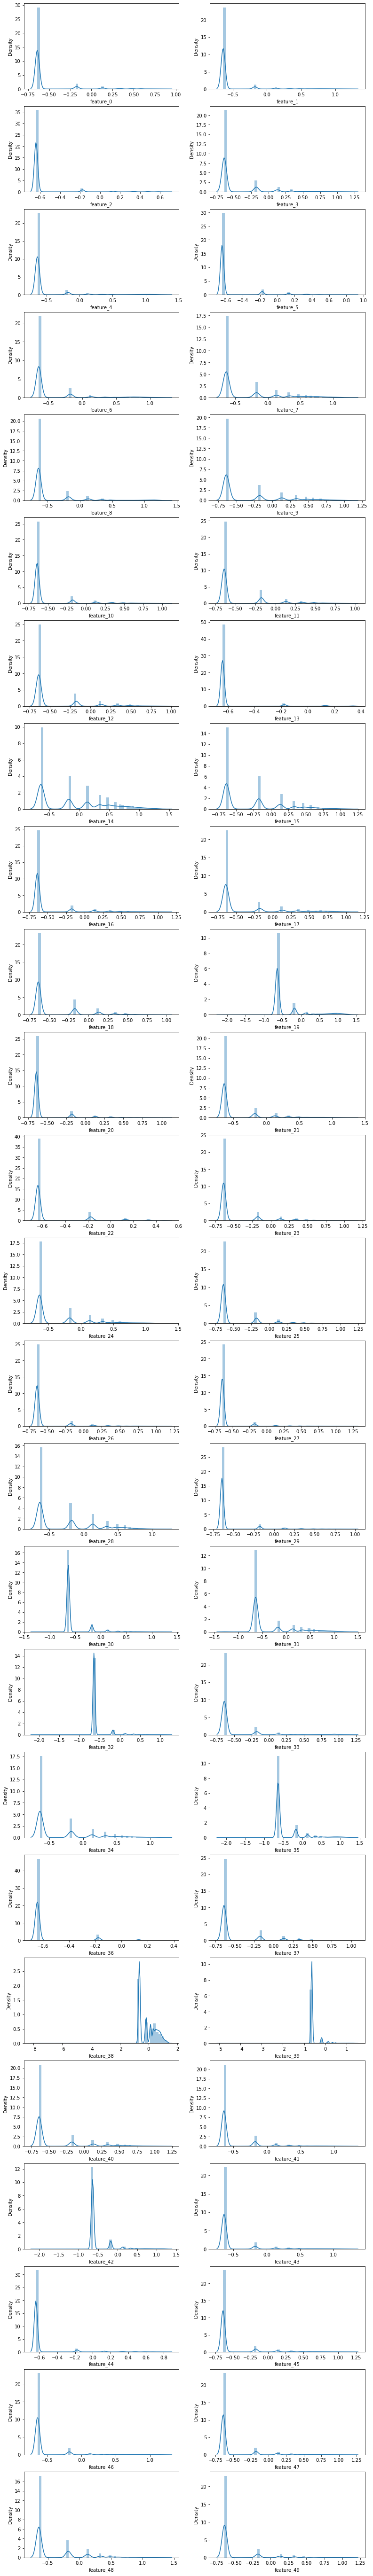

In [33]:
fig,axes=plt.subplots(25,2,figsize=(13,100))
for column,ax in zip(df_train.columns,axes.ravel()):
    sns.distplot(df_train[column],ax=ax)

In [5]:
print("Kurtosis\n")
print(df_train.kurtosis())
print("\n\n\nSkewness\n")
print(df_train.skew())

Kurtosis

feature_0     10.029356
feature_1     12.809852
feature_2     20.463856
feature_3      4.557340
feature_4     12.728631
feature_5     12.204160
feature_6      5.243049
feature_7      0.523628
feature_8      6.372363
feature_9      0.520075
feature_10     9.042588
feature_11     3.654668
feature_12     3.070727
feature_13    22.337210
feature_14    -0.958737
feature_15    -0.256622
feature_16     7.932720
feature_17     2.227425
feature_18     2.518902
feature_19     2.827844
feature_20    11.286879
feature_21     4.817797
feature_22     7.416071
feature_23     5.974102
feature_24     1.232506
feature_25     6.213991
feature_26    11.775191
feature_27    18.505534
feature_28    -0.348677
feature_29    16.734417
feature_30    11.473663
feature_31     0.649570
feature_32    17.767549
feature_33     8.377894
feature_34     0.714008
feature_35     4.196496
feature_36    11.258165
feature_37     4.456694
feature_38    -0.787912
feature_39    13.578345
feature_40     1.900969
featur

In [3]:
X=df_train[df_train.columns[:-1]].to_numpy()
y=df_train[df_train.columns[-1]].to_numpy().reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [35]:
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
rfc=RandomForestClassifier().fit(X_train,y_train)

print("LogisticRegression accuracy: {}".format(lr.score(X_test,y_test)))
print("LogisticRegression log_loss: {}".format(log_loss(y_test,lr.predict_proba(X_test))))
print("RFC accuracy: {}".format(rfc.score(X_test,y_test)))
print("RFC log_loss: {}".format(log_loss(y_test,rfc.predict_proba(X_test))))

LogisticRegression accuracy: 0.58
LogisticRegression log_loss: 1.10
RFC accuracy: 0.58
RFC log_loss: 1.13


In [36]:
pipe=Pipeline(steps=[("scaler",StandardScaler()),("classifier",LogisticRegression(max_iter=10000))])
param_grid={"classifier__C":[0.0001,0.001,0.01,0.1,1,10]}
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5,n_jobs=-1,scoring="neg_log_loss")

In [37]:
grid.fit(X_train,y_train)
print("Best params: {}".format(grid.best_params_))
print("Best score: {}".format(grid.best_score_))
print("Test score: {}".format(grid.score(X_test,y_test)))

Best params: {'classifier__C': 0.001, 'scaler': StandardScaler()}
Best score: -1.1013789456188057


In [5]:
pipe_rfc=Pipeline(steps=[("scaler",StandardScaler()),
                         ("classifier",RandomForestClassifier(random_state=42))])
param_grid_rfc={"classifier__min_samples_split":[2,5,9],
               "classifier__max_features":["log2"],
               "classifier__n_estimators":[200],
               "classifier__criterion":["entropy"]}
grid_rfc=GridSearchCV(pipe_rfc,param_grid=param_grid_rfc,cv=5,n_jobs=-1,scoring="neg_log_loss")

In [6]:
grid_rfc.fit(X_train,y_train)

print("Best params: {}".format(grid_rfc.best_params_))
print("Best score: {}".format(grid_rfc.best_score_))
print("Test score: {}".format(grid_rfc.score(X_test,y_test)))

Best params: {'classifier__criterion': 'entropy', 'classifier__max_features': 'log2', 'classifier__min_samples_split': 9, 'classifier__n_estimators': 200}
Best score: -1.107722813468672
Test score: -1.1068976577091834


In [9]:
pipe_xgbc=Pipeline(steps=[("scaler",StandardScaler()),
                          ("classifier",XGBClassifier(random_state=42))])
param_grid_xgbc={"classifier__learning_rate":[0.3,0.1,0.05],
                "classifier__gamma": [0,0.1,1,10],
                "classifier__booster":["gbtree"],
                "classifier__eval_metric":["mlogloss"],
                "classifier__tree_method":["gpu_hist"]}
grid_xgbc=GridSearchCV(pipe_xgbc,param_grid=param_grid_xgbc,cv=5,scoring="neg_log_loss")

In [10]:
grid_xgbc.fit(X_train,y_train)
print("Best params: {}".format(grid_xgbc.best_params_))
print("Best score: {}".format(grid_xgbc.best_score_))
print("Test score: {}".format(grid_xgbc.score(X_test,y_test)))

Best params: {'classifier__booster': 'gbtree', 'classifier__eval_metric': 'mlogloss', 'classifier__gamma': 1, 'classifier__learning_rate': 0.1, 'classifier__tree_method': 'gpu_hist'}
Best score: -1.0985818263284366
Test score: -1.0958404326286912


In [8]:
pipe_lgbmc=Pipeline(steps=[("scaler",StandardScaler()),
                          ("classifier",LGBMClassifier())])
param_grid_lgbmc={"classifier__learning_rate":[0.2,0.1,0.05],
                "classifier__reg_lambda": [0,0.1,1],
                "classifier__reg_alpha":[0,0.1,1],
                "classifier__device":["gpu"],
                "classifier__random_state":[42]}
grid_lgbmc=GridSearchCV(pipe_lgbmc,param_grid=param_grid_lgbmc,cv=5,scoring="neg_log_loss")

In [9]:
grid_lgbmc.fit(X_train,y_train)
print("Best params: {}".format(grid_lgbmc.best_params_))
print("Best score: {}".format(grid_lgbmc.best_score_))
print("Test score: {}".format(grid_lgbmc.score(X_test,y_test)))

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: 

In [7]:
#trying out polynomial features to see if it makes any difference
poly_features=PolynomialFeatures(degree=2,interaction_only=True, include_bias=False).fit(X_train)
X_train_poly=poly_features.transform(X_train)
X_test_poly=poly_features.transform(X_test)

In [14]:
X_train_poly.shape

(75000, 1275)

In [5]:
pipe=Pipeline(steps=[("scaler",StandardScaler()),("classifier",LogisticRegression(max_iter=10000))])
param_grid={"classifier__C":[0.0001,0.001,0.01,0.1,1,10]}
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5,n_jobs=-1,scoring="neg_log_loss")
grid.fit(X_train_poly,y_train)
print("Best params: {}".format(grid.best_params_))
print("Best score: {}".format(grid.best_score_))
print("Test score: {}".format(grid.score(X_test_poly,y_test)))

Best params: {'classifier__C': 0.0001}
Best score: -1.102450754995868
Test score: -1.1006921718948082


In [8]:
pipe_rfc=Pipeline(steps=[("scaler",StandardScaler()),
                         ("classifier",RandomForestClassifier(random_state=42))])
param_grid_rfc={"classifier__min_samples_split":[2,5,7,9],
               "classifier__max_features":["sqrt","log2"],
               "classifier__n_estimators":[200],
               "classifier__criterion":["entropy"]}
grid_rfc=GridSearchCV(pipe_rfc,param_grid=param_grid_rfc,cv=5,n_jobs=-1,scoring="neg_log_loss")

grid_rfc.fit(X_train_poly,y_train)

print("Best params: {}".format(grid_rfc.best_params_))
print("Best score: {}".format(grid_rfc.best_score_))
print("Test score: {}".format(grid_rfc.score(X_test_poly,y_test)))

Best params: {'classifier__criterion': 'entropy', 'classifier__max_features': 'log2', 'classifier__min_samples_split': 9, 'classifier__n_estimators': 200}
Best score: -1.1079436220657748
Test score: -1.1091012877768516


In [10]:
from sklearn.feature_selection import SelectFromModel
sel=SelectFromModel(grid_rfc.best_estimator_.named_steps["classifier"],
                   max_features=100,prefit=True)
X_train_poly_sel=sel.transform(X_train_poly)
X_test_poly_sel=sel.transform(X_test_poly)

In [11]:
pipe_xgbc=Pipeline(steps=[("scaler",StandardScaler()),
                          ("classifier",XGBClassifier())])
param_grid_xgbc={"classifier__learning_rate":[0.1,0.07],
                 "classifier__max_depth":[3,4],
                "classifier__gamma": [0.1,0.3],
                "classifier__booster":["gbtree"],
                "classifier__eval_metric":["mlogloss"],
                "classifier__tree_method":["gpu_hist"],
                "classifier__reg_lambda":[0,0.1,1],
                "classifier__random_state":[42],
                "classifier__objective":["multi:softprob"]}
grid_xgbc=GridSearchCV(pipe_xgbc,param_grid=param_grid_xgbc,cv=4,scoring="neg_log_loss")

grid_xgbc.fit(X_train_poly_sel,y_train)
print("Best params: {}".format(grid_xgbc.best_params_))
print("Best score: {}".format(grid_xgbc.best_score_))
print("Test score: {}".format(grid_xgbc.score(X_test_poly_sel,y_test)))

Best params: {'classifier__booster': 'gbtree', 'classifier__eval_metric': 'mlogloss', 'classifier__gamma': 0.3, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__objective': 'multi:softprob', 'classifier__random_state': 42, 'classifier__reg_lambda': 1, 'classifier__tree_method': 'gpu_hist'}
Best score: -1.1086930995353064
Test score: -1.1066380307847261


In [12]:
pipe_lgbmc=Pipeline(steps=[("scaler",StandardScaler()),
                          ("classifier",LGBMClassifier())])
param_grid_lgbmc={"classifier__learning_rate":[0.05],
                "classifier__reg_lambda": [0,1],
                "classifier__device":["gpu"],
                "classifier__random_state":[42]}
grid_lgbmc=GridSearchCV(pipe_lgbmc,param_grid=param_grid_lgbmc,cv=4,scoring="neg_log_loss")
grid_lgbmc.fit(X_train_poly_sel,y_train)
print("Best params: {}".format(grid_lgbmc.best_params_))
print("Best score: {}".format(grid_lgbmc.best_score_))
print("Test score: {}".format(grid_lgbmc.score(X_test_poly_sel,y_test)))

Best params: {'classifier__device': 'gpu', 'classifier__learning_rate': 0.05, 'classifier__random_state': 42, 'classifier__reg_lambda': 1}
Best score: -1.108315380444573
Test score: -1.1053658947278913
